# Analysis of 3-D MNIST

In this script we will see how GFT is also able to cluster the 3-D handwritten MNIST digits. In order to show the rotation invariance, the [GFT()](#GFT) function has a random rotation along the three main axes included. 
There are two plots generated, one with UMAP, generating a scatterplot and a distance matrix.

### I - Spherical transformation and Fourier transform

This part of the workflow transforms an n x n x n image to spherical coordinates before Fourier transform is applied. In brief, spherical transformation renders rotation invariance and Fouriertransformation followed by [`.flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) transforms the image into a n*n*n long vector. For technical details refer to [Wagner et al., 2019](https://ieeexplore.ieee.org/document/8856734).

The following functions were coded with the help of Patrick Wagner the author of [Wagner et al., 2019](https://ieeexplore.ieee.org/document/8856734) (commented in code)

The function `GFT(..)` uses the following variables:
- file: filename of the input image
- channels: the desired channels passed as list ->Eg. we want channel 1 and 3 ==> channels=[0,2] if the image contains only one channel --> len(img.shape)=3, then type 'NULL'
- size: An input image with dimension 40x40x40 yields a vector of length 64000 and is already sufficient as a morphological feature vector. One could try out lower resolution below 35 and compare the results. The smaller the image the, faster the function 


In [1]:
#packages
import numpy as np
import os
import glob
from scipy import fftpack
from scipy.ndimage.interpolation import geometric_transform,rotate
from skimage import io
from skimage.transform import resize

In [2]:
<a id='GFT'></a>

SyntaxError: invalid syntax (2997975299.py, line 1)

In [3]:
#It is recommended to use size in a range of 40-50. 
#Eg. an input image with dimension 40x40x40 yields a vector of length 64000, this is already sufficient for morphological feature vector
#one could try out lower resolution below 35 and compare the results.

def open_file(file,channels,size):
    #if the input consists of one channel only
    if channels == 'NULL':
        img=io.imread(file)
        downscale=size/img.shape[1]
        img=resize(img, (img.shape[0]*downscale,img.shape[1]*downscale,img.shape[2]*downscale), anti_aliasing=False)
        #include rotation around the three axis randomly
        x=[-6,-5,-4,-3,1,-2,2,3,4,5,6]
        img=rotate(img,(360/np.random.choice(x)),axes=(1,2),reshape=False)
        return img
        
    if len(channels) == 1:
        img=io.imread(file)
        img= img[channels[0],:,:,:]
        downscale=size/img.shape[1]
        img=resize(img, (img.shape[0]*downscale,img.shape[1]*downscale,img.shape[2]*downscale), anti_aliasing=False)
        return img
    #if the input has more than one channel
    if len(channels)> 1:
        img_channels=[]
        for channel in channels:
           img=io.imread(file)
           img_channel=img[channel,:,:,:]
           downscale=size/img.shape[1]
           img_channel=resize(img_channel, (img.shape[1]*downscale,img.shape[2]*downscale,img.shape[3]*downscale),anti_aliasing=False)
           img_channels.append(img_channel)
        return np.array(img_channels)
                
#transformation to spherical coordinates
#code snippet kindly provided by Patrick Wagner
def to_spherical(img,channels, shape, order=1):
    spherical_images=[]
    if channels =='NULL':
        D = shape[1] - 1
        R = D/2.
        def transform(coords):
                    [z,x,y] =  coords
                    phi = np.pi*z / R
                    theta = np.pi*y / R
                    rho =  x / 2.

                    x = rho*np.sin(theta)*np.cos(phi) + R
                    y = rho*np.sin(theta)*np.sin(phi) + R
                    z = rho*np.cos(theta) + R
                    return z,x,y

        spherical = geometric_transform(img, transform, order=order, mode='nearest', prefilter=False)
        spherical_images.append(spherical)
    else:    
        for n in range(len(channels)):
                    D = shape[1] - 1
                    R = D/2.
                    def transform(coords):
                        [z,x,y] =  coords
                        phi = np.pi*z / R
                        theta = np.pi*y / R
                        rho =  x / 2.

                        x = rho*np.sin(theta)*np.cos(phi) + R
                        y = rho*np.sin(theta)*np.sin(phi) + R
                        z = rho*np.cos(theta) + R
                        return z,x,y
                    spherical = geometric_transform(img[n,:,:,:], transform, order=order, mode='nearest', prefilter=False)
                    spherical_images.append(spherical)
    return spherical_images

#generic Fourier transformation
#code snippet kindly provided by Patrick Wagner
def GFT(file,channels,size):
      if channels == 'NULL':
        print(file)    
        images=to_spherical(open_file(file,channels,size),channels,open_file(file,channels,size).shape)
        result=abs(fftpack.fftshift(fftpack.fftn(images))).flatten()
        return result
      else:
        collection=[]
        images=np.array(to_spherical(open_file(file,channels,size),channels,open_file(file,channels,size).shape))
        for image in range(images.shape[0]):
                print(file)
                result=abs(fftpack.fftshift(fftpack.fftn(images[image,:,:,:]))).flatten()
                collection.append(result)
        return np.array(collection)


<a id='II'></a>

In [4]:
path='./'

#this code creates a list with all the files to be passed to GFT(). Make sure that they all contain the same dimensions
file_location = os.path.join(path,'*.tif')
filenames = glob.glob(file_location)
filenames.sort()

size = 35

gft=np.array([GFT(file,'NULL',size) for file in filenames])


./0_1.tif
./0_108.tif
./0_114.tif
./0_118.tif
./0_119.tif
./0_121.tif
./0_156.tif
./0_169.tif
./0_192.tif
./0_206.tif
./0_209.tif
./0_21.tif
./0_210.tif
./0_216.tif
./0_229.tif
./0_232.tif
./0_234.tif
./0_246.tif
./0_249.tif
./0_260.tif
./0_283.tif
./0_293.tif
./0_296.tif
./0_303.tif
./0_320.tif
./0_326.tif
./0_34.tif
./0_359.tif
./0_37.tif
./0_399.tif
./0_427.tif
./0_429.tif
./0_435.tif
./0_440.tif
./0_451.tif
./0_453.tif
./0_458.tif
./0_462.tif
./0_464.tif
./0_473.tif
./0_489.tif
./0_51.tif
./0_519.tif
./0_524.tif
./0_526.tif
./0_527.tif
./0_542.tif
./0_56.tif
./0_577.tif
./0_582.tif
./0_596.tif
./0_603.tif
./0_612.tif
./0_63.tif
./0_68.tif
./0_69.tif
./0_75.tif
./0_81.tif
./0_88.tif
./0_95.tif
./1_102.tif
./1_104.tif
./1_105.tif
./1_112.tif
./1_113.tif
./1_124.tif
./1_128.tif
./1_134.tif
./1_14.tif
./1_152.tif
./1_174.tif
./1_177.tif
./1_184.tif
./1_200.tif
./1_201.tif
./1_205.tif
./1_208.tif
./1_211.tif
./1_224.tif
./1_23.tif
./1_231.tif
./1_24.tif
./1_248.tif
./1_251.tif
./1_269.t

### III - Construct data frame with experimental details and additional measurements

This part constructs the dataframe with the experimental details. What kind of details are provided is up to the user. 

The function `data(..)` uses the following variables:

- file = filenames of the image
- details = column with the specified experimental details to extract. The details need to be separated by `_` in the file, otherwise it will not be taken into account. Eg file='expnr_day_month_name_nucleus.tif'
- pixelsize = pixel size in µm
- path = path to were the image is saved
- barcode = 0 or 1, Eg. does the filename provide information about the experimental details? if yes -> 1 else 0
- intensity= does the image contain any intensity channels (additional to the segmentation channel)? if yes -> 1 else 0

The function `data(...)` uses underscore `'_'` to extract exp. details:
Eg.:

`file = '10_11_22_WT_C_D_A+B_07-05.tif'`

the barcode above can be decoded as follows:

| day | month | year | Genotype | Antibody 1 | Antibody 2 | Treatment | nucleus_id |
| --- | ----- | ---- | -------- | ---------- | ---------- | --------- | ---------- |
| 10  |  11   |  22  |    WT    |      C     |     D      |    A+B    |    07-05   |

note that the nucleus_id provides information in what image the nucleus can be found -> 10_11_22_WT_C_D_A+B_07.tif

####Additional measurements

`data(..)` additionally measures some propieties of the nucleus such as area, volume, solidity etc. this can be costumized and adapted to individual needs. For area,volume and solidity measurements, the channel needs to be binary!


In [5]:
#packages
import numpy as np
import os
import glob
import pandas as pd
from skimage import io
from skimage.measure import regionprops,regionprops_table,marching_cubes,mesh_surface_area
from scipy.ndimage import label

In [6]:
def data(file,details,pixelsize,path,barcode,intensity):
    print(file)
    image=io.imread(file)
    
  
    if intensity == 0:
            img=image[:,:,:]
           
            #retrieve proprieties with skimage regionprops()
            proprieties=regionprops(img)
            area=marching_cubes(img,step_size=1)
            area=mesh_surface_area(area[0],area[1])
            area=area*pixelsize**2
            volume=np.count_nonzero(img)
            volume_µm3=volume*pixelsize**3
            extent=proprieties[0].extent
            solidity=proprieties[0].solidity
            columns_data=['area [µm$^2$]','volume[µm$^3$]','extent','solidity']
            data=[area,volume,extent,solidity]
            df_data=pd.DataFrame([data],columns=columns_data)
            
            
    if intensity == 1:
            img=image[0,:,:,:]
            #retrieve proprieties with skimage regionprops()
            proprieties=regionprops(img)
            area=marching_cubes(img,step_size=1)
            area=mesh_surface_area(area[0],area[1])
            area=area*pixelsize**2
            volume=np.count_nonzero(img)
            volume=volume*pixelsize*pixelsize*pixelsize
            extent=proprieties[0].extent
            solidity=proprieties[0].solidity
            columns_data=['area [µm$^2$]','volume[µm$^3$]','extent',
                                  'solidity']
            data=[area,volume,extent,solidity]
             #intensity ch_1 and ch_2
            for channel in range(1,image.shape[0]):
                protein=image[channel,:,:,:][img>0].mean()
                data.append(protein)
                columns_data.append('Protein '+str(channel))
            df_data=pd.DataFrame([data],columns=columns_data)
    
    if barcode == 1:
            image=io.imread(file)
            # extract details from barcode:
            barcode=file[len(path):-4]
            barcode=barcode.replace('__','_')
            #barcode=barcode.replace('-','_')
            barcode=barcode.split('_')
            df_details=pd.DataFrame([barcode],columns=details)
            return pd.DataFrame([barcode+data],columns=details+columns_data)  
    else:
        return df_data 


<a id='data_frame_details'></a>

In [7]:
#what the barcode is encoding for
details = ['Nr','Sample']

path='./'

#this code creates a list with all the files to be passed to GFT(). Make sure that they all contain the same dimensions
file_location = os.path.join(path,'*.tif')
filenames = glob.glob(file_location)
filenames.sort()

pixelsize_µm=1
list_details=[data(file,details,pixelsize_µm,path,1,0) for file in filenames]
data_frame_details=pd.concat(list_details).reset_index()
data_frame_details.drop(['index'],axis=1,inplace=True)




./0_1.tif
./0_108.tif
./0_114.tif
./0_118.tif
./0_119.tif
./0_121.tif
./0_156.tif
./0_169.tif
./0_192.tif
./0_206.tif
./0_209.tif
./0_21.tif
./0_210.tif
./0_216.tif
./0_229.tif
./0_232.tif
./0_234.tif
./0_246.tif
./0_249.tif
./0_260.tif
./0_283.tif
./0_293.tif
./0_296.tif
./0_303.tif
./0_320.tif
./0_326.tif
./0_34.tif
./0_359.tif
./0_37.tif
./0_399.tif
./0_427.tif
./0_429.tif
./0_435.tif
./0_440.tif
./0_451.tif
./0_453.tif
./0_458.tif
./0_462.tif
./0_464.tif
./0_473.tif
./0_489.tif
./0_51.tif
./0_519.tif
./0_524.tif
./0_526.tif
./0_527.tif
./0_542.tif
./0_56.tif
./0_577.tif
./0_582.tif
./0_596.tif
./0_603.tif
./0_612.tif
./0_63.tif
./0_68.tif
./0_69.tif
./0_75.tif
./0_81.tif
./0_88.tif
./0_95.tif
./1_102.tif
./1_104.tif
./1_105.tif
./1_112.tif
./1_113.tif
./1_124.tif
./1_128.tif
./1_134.tif
./1_14.tif
./1_152.tif
./1_174.tif
./1_177.tif
./1_184.tif
./1_200.tif
./1_201.tif
./1_205.tif
./1_208.tif
./1_211.tif
./1_224.tif
./1_23.tif
./1_231.tif
./1_24.tif
./1_248.tif
./1_251.tif
./1_269.t

In [10]:
#inspect the generated dataframe
data_frame_details

,Nr,Sample,area [µm$^2$],volume[µm$^3$],extent,solidity
0,0,1,6858.509766,21168,0.589572,0.735409
1,0,108,7644.154785,21856,0.515083,0.612831
2,0,114,7690.845215,26000,0.637755,0.763269
3,0,118,6906.378418,19440,0.567227,0.684507
4,0,119,7652.633789,27312,0.643665,0.826234
...,...,...,...,...,...,...
595,9,54,6352.581055,18192,0.474343,0.668824
596,9,550,5767.940918,17376,0.575517,0.763176
597,9,57,5030.704590,14400,0.551471,0.760778
598,9,80,6822.493164,19984,0.661897,0.744338


### IV - Morphological feature vector and final dataframe

In this last step, a dataframe containing  morphological feature vectors is constructed using the `gft` array from [II](#II) and merged to [`data_frame_details`](#data_frame_details). In the end, a `final_data_frame`


As suggested by the authors of the publication [Wagner et al., 2019](https://ieeexplore.ieee.org/document/8856734), the morphologica feature vector is constructed by setting the first six principal compontents from the flattened Fourier transform image (now as rows in `gft`). The reason for this lies in the explained variance. After PCA 6, the increase of explained variance is minor. We can explore this notion by plotting the explained variannce in percentage over the principal components. 

In [11]:
#packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

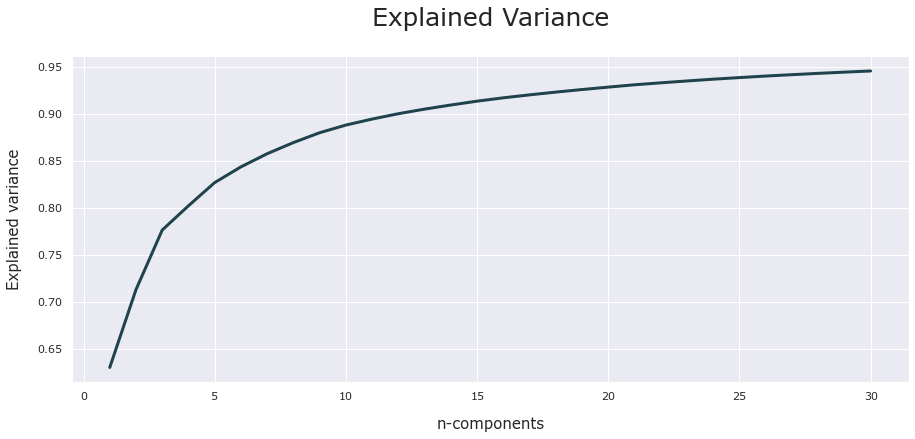

In [12]:
####pca####


##the gft array contains the information for three channels -> gft[#channels,#nuclei,(n*n*n)] , n= pixels
# feature_vector(gft,vector_dimension), vector_dimension is a list -> [#pca_ch_0,#pca_ch_1,#pca_ch2] depending on the amount of channels


##the gft array contains the information for three channels -> gft[#channels,#nuclei,(n*n*n)] , n= pixels
# feature_vector(gft,vector_dimension), vector_dimension is a list -> [#pca_ch_0,#pca_ch_1,#pca_ch2] depending on the amount of channels


def feature_vector(gft,vector_dimension):   
    if len(gft.shape)==2:
        if len(gft.shape) != (len(vector_dimension)+1):
            print ('channels is not equal vector_dimensiomn')
        else:
            nr_pca=PCA(n_components=vector_dimension[0],whiten=True)
            feature_vec=nr_pca.fit_transform(gft)
            feature_vec_var=np.cumsum(nr_pca.explained_variance_ratio_)
            return np.array([feature_vec,feature_vec_var],dtype=object)
    if len(gft.shape) > 2:
        if gft.shape[0] != len(vector_dimension):
            print ('channels is not equal vector_dimensiomn')
        else:
            feature_vector_list=[]
            for n in range(gft.shape[0]):
                nr_pca=PCA(n_components=vector_dimension[n],whiten=True)
                feature_vec=nr_pca.fit_transform(gft[:,n,:])
                feature_vec_var=np.cumsum(nr_pca.explained_variance_ratio_)
                feature_vector_list.append([feature_vec,feature_vec_var])
            return np.array(feature_vector_list,dtype=object)
        
feature_vec_gft=feature_vector(gft,[30])

# Plot variance


def plot_var(feature_vec_gft,size):
    if len(feature_vec_gft.shape)==1:
        fig = plt.figure(figsize=size)
        sns.set(font='MS Reference Sans Serif',context='notebook')
        plt.title('Explained Variance',fontsize=25,pad=30)
        sns.lineplot(x=(np.arange(len(feature_vec_gft[0][0,:])) + 1),y=feature_vec_gft[1],legend=False,linewidth=3,color='#1E434C')
        plt.ylabel('Explained variance',fontsize=15,labelpad=15,fontweight=15)
        plt.xlabel('n-components',fontsize=15,labelpad=15,fontweight=15)
        fig.savefig('pca_expl_var.png')
    else:   
        fig, axes = plt.subplots(1,len(feature_vec_gft),figsize=size,sharey=False)
        sns.set(font='MS Reference Sans Serif',context='notebook')
        fig.suptitle('Explained Variance',fontsize=25,y=1.05)
        for n in range(len(feature_vec_gft)):
            sns.lineplot(ax=axes[n],x=(np.arange(len(feature_vec_gft[n,0][0,:])) + 1),y=feature_vec_gft[n,1],legend=False,linewidth=3,color='#1E434C')
            axes[n].set_title(('Channel '+str(n)),fontsize=20)
            axes[0].set_ylabel('Explained variance',fontsize=15,labelpad=15,fontweight=15)
            axes[n].set_xlabel('n-components',fontsize=15,labelpad=15,fontweight=15)
        fig.savefig('pca_expl_var.png')
                
                
            

plot_var(feature_vec_gft,(15,6))




From the explained variance plot we now can see that we have PC 1-6 explaining the majority of the data. 


In [13]:
# generate feature vector table with first six PCA

# make_colums takes the number of channels and the desired PCA per channel as a list. 
#Eg. we have ch_1, ch_2 and ch_3 --> total_channels = 3
#Eg. for all the channels we want PCA 1-6 --> vector_dimension= [6,6,6]
def make_columns(total_channels,vector_dimension):
    columns=[]
    if len(vector_dimension)!= total_channels:
        print ('total_channels is not equal pca_ch')
    else:
        for m in range (total_channels):
            for n in range(1,vector_dimension[m]+1):
                columns.append('ch_'+str(m)+'_PCA_'+str(n))
    return columns

vector_dimension=[6]

feature_vec_gft_pca6 =  feature_vector(gft,vector_dimension)

#here we create an array with pca 1-6 per channel. 
#Eg. structure of feature_vec_gft_pca6[0,0] --> feature_vec_gft_pca6[ch_1,pca 1-6]
feature_vec_gft_array_pca6=feature_vec_gft_pca6[0]

#here a pandas Dataframe is constructed wit the principcal components for each channel 
feature_vector_table = pd.DataFrame(feature_vec_gft_array_pca6,columns=make_columns(1,vector_dimension))



In [14]:
feature_vector_table 

,ch_0_PCA_1,ch_0_PCA_2,ch_0_PCA_3,ch_0_PCA_4,ch_0_PCA_5,ch_0_PCA_6
0,1.856994,0.483505,0.253062,0.688329,0.684570,-0.150885
1,1.975804,2.366367,1.054120,-0.963734,1.014172,2.609029
2,1.850370,0.687182,1.140586,0.813244,0.869277,0.706106
3,1.926675,0.714403,0.006095,0.588242,0.889764,0.147503
4,1.587371,0.045148,1.323651,1.313111,0.575973,-0.952067
...,...,...,...,...,...,...
595,-0.745455,-0.555986,0.750669,-1.125896,-0.881380,0.831496
596,-0.621620,-0.375360,0.951149,-1.580197,0.719375,0.305219
597,-0.728858,-0.242457,0.287231,-1.724593,-0.562808,0.752422
598,0.946171,-1.158639,-0.353862,0.727242,0.988092,0.729262


In [15]:
#join the data_frame_details with feature_vector_table to create data_frame_final

data_frame_final=pd.concat([data_frame_details,feature_vector_table],axis=1)

In [16]:
#inspect data_frame_final
data_frame_final

,Nr,Sample,area [µm$^2$],volume[µm$^3$],extent,solidity,ch_0_PCA_1,ch_0_PCA_2,ch_0_PCA_3,ch_0_PCA_4,ch_0_PCA_5,ch_0_PCA_6
0,0,1,6858.509766,21168,0.589572,0.735409,1.856994,0.483505,0.253062,0.688329,0.684570,-0.150885
1,0,108,7644.154785,21856,0.515083,0.612831,1.975804,2.366367,1.054120,-0.963734,1.014172,2.609029
2,0,114,7690.845215,26000,0.637755,0.763269,1.850370,0.687182,1.140586,0.813244,0.869277,0.706106
3,0,118,6906.378418,19440,0.567227,0.684507,1.926675,0.714403,0.006095,0.588242,0.889764,0.147503
4,0,119,7652.633789,27312,0.643665,0.826234,1.587371,0.045148,1.323651,1.313111,0.575973,-0.952067
...,...,...,...,...,...,...,...,...,...,...,...,...
595,9,54,6352.581055,18192,0.474343,0.668824,-0.745455,-0.555986,0.750669,-1.125896,-0.881380,0.831496
596,9,550,5767.940918,17376,0.575517,0.763176,-0.621620,-0.375360,0.951149,-1.580197,0.719375,0.305219
597,9,57,5030.704590,14400,0.551471,0.760778,-0.728858,-0.242457,0.287231,-1.724593,-0.562808,0.752422
598,9,80,6822.493164,19984,0.661897,0.744338,0.946171,-1.158639,-0.353862,0.727242,0.988092,0.729262


In [17]:
#data_frame_final can now be exported as .csv file 
data_frame_final.to_csv('data_frame_final_mnist3d.csv',index=False)

### Examples on how to analyse and interprete the data in data_frame_final

This part of the script will present some examples on how to explore the underlying structure of the data. 
There are no limitations on how to plot this data, the more features one inlcudes in the data_frame, the more insights one can get :D

### Analysis with UMAP

We will start analysing the data with [UMAP](https://umap-learn.readthedocs.io/en/latest/). On of the great advantages of UMAP is the fast computation of dimensionality reduction.

In [18]:
import umap

In [19]:
#lets start with the default umap settings

dim_red=umap.UMAP()

#ch_0 embedding
embb_=dim_red.fit_transform(data_frame_final.iloc[:,-6:])



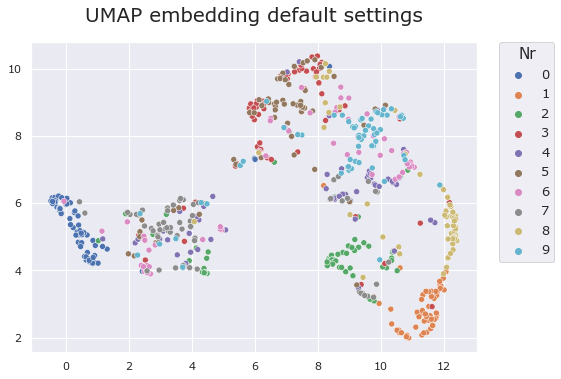

In [20]:
#make plot with the embeddings

def plot_emb(data,array_emb,size):
    if array_emb.shape[0]==1:
        fig = plt.figure(figsize=(8,5.71))
        sns.set(font='MS Reference Sans Serif',context='notebook')
        plt.title('UMAP embedding default settings',fontsize=20,pad=20,fontweight=15)
        ax=sns.scatterplot(x=array_emb[0][:,0],y=array_emb[0][:,1],hue=data_frame_details['Nr'],)
        legend=ax.legend(title='Nr',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 13})
        legend.get_title().set_fontsize('15')
        fig.savefig('embeddings_default_UMAP.png')
    else:
        
        fig, axes = plt.subplots(1,3,figsize=size,sharey=False)
        sns.set(font='MS Reference Sans Serif',context='notebook')
        fig.suptitle('UMAP embedding with default settings',fontsize=25,y=1.05)
        for n in range(array_emb.shape[0]-1):
            sns.scatterplot(ax=axes[n],x=array_emb[n,:,0],y=array_emb[n,:,1],hue=data['Treatment'],legend=False)
            axes[n].set_title(('Channel-'+str(n)+' PC 1-6'),fontsize=20)
        sns.scatterplot(ax=axes[(array_emb.shape[0]-1)],x=array_emb[(array_emb.shape[0]-1),:,0],y=array_emb[(array_emb.shape[0]-1),:,1],hue=data['Treatment'])
        legend=axes[(array_emb.shape[0]-1)].legend(title='Treatment',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 13})
        legend.get_title().set_fontsize('15')
        axes[(array_emb.shape[0]-1)].set_title(('Channel-'+str((array_emb.shape[0]-1))+' PC 1-6'),fontsize=20)
        fig.savefig('embeddings_default_UMAP.png')

plot_emb(data_frame_details,np.array([embb_]),(15,6))

The implementation of GFT to the 3D mnist_data demonstrates the ability to cluster the numbers by their shape. Nevertheless some of the numbers are too similar to be separated clearly (eg. 3 and 5). Note how 6 is spread throught the graph. This could be realted to a segmentation issue on the script used to make the digits from 2D to 3D. 

In [18]:
#lets look at the structure of the physical attributes
#the columns we need --> ['area [µm$^2$]','volume[µm$^3$]','extent','solidity'], taken from the function data() in section III 
columns=['area [µm$^2$]','volume[µm$^3$]','extent','solidity']
data_frame_phys=data_frame_details[data_frame_details.columns.intersection(columns)]
data_frame_phys

,area [µm$^2$],volume[µm$^3$],extent,solidity
0,6858.509766,21168,0.589572,0.735409
1,7644.154785,21856,0.515083,0.612831
2,7690.845215,26000,0.637755,0.763269
3,6906.378418,19440,0.567227,0.684507
4,7652.633789,27312,0.643665,0.826234
...,...,...,...,...
595,6352.581055,18192,0.474343,0.668824
596,5767.940918,17376,0.575517,0.763176
597,5030.704590,14400,0.551471,0.760778
598,6822.493164,19984,0.661897,0.744338


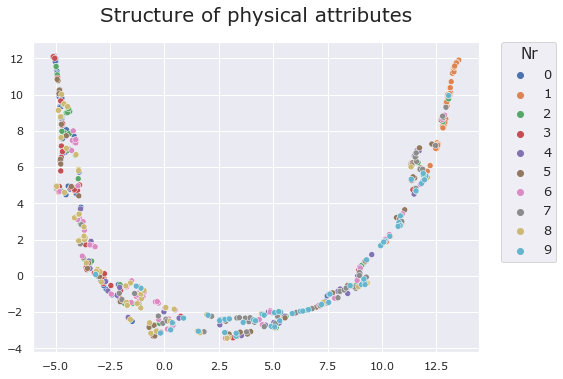

In [19]:
embb_phys=dim_red.fit_transform(data_frame_phys)

fig = plt.figure(figsize=(8,5.71))
sns.set(font='MS Reference Sans Serif',context='notebook')
plt.title('Structure of physical attributes',fontsize=20,pad=20,fontweight=15)
ax=sns.scatterplot(x=embb_phys[:,0],y=embb_phys[:,1],hue=data_frame_details['Nr'],)
legend=ax.legend(title='Nr',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 13})
legend.get_title().set_fontsize('15')


The data looking only at `['area [µm$^2$]','volume[µm$^3$]','extent','solidity']` is distributed very narrowly containing little information about the underlying distribution of shapes. 

In [20]:
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import distance_matrix
import scipy.optimize as opt
from scipy.stats import norm
import itertools

In [21]:
#plot the data on distance matrix
R1=squareform(1-pdist(feature_vec_gft_array_pca6, metric= 'euclidean'))


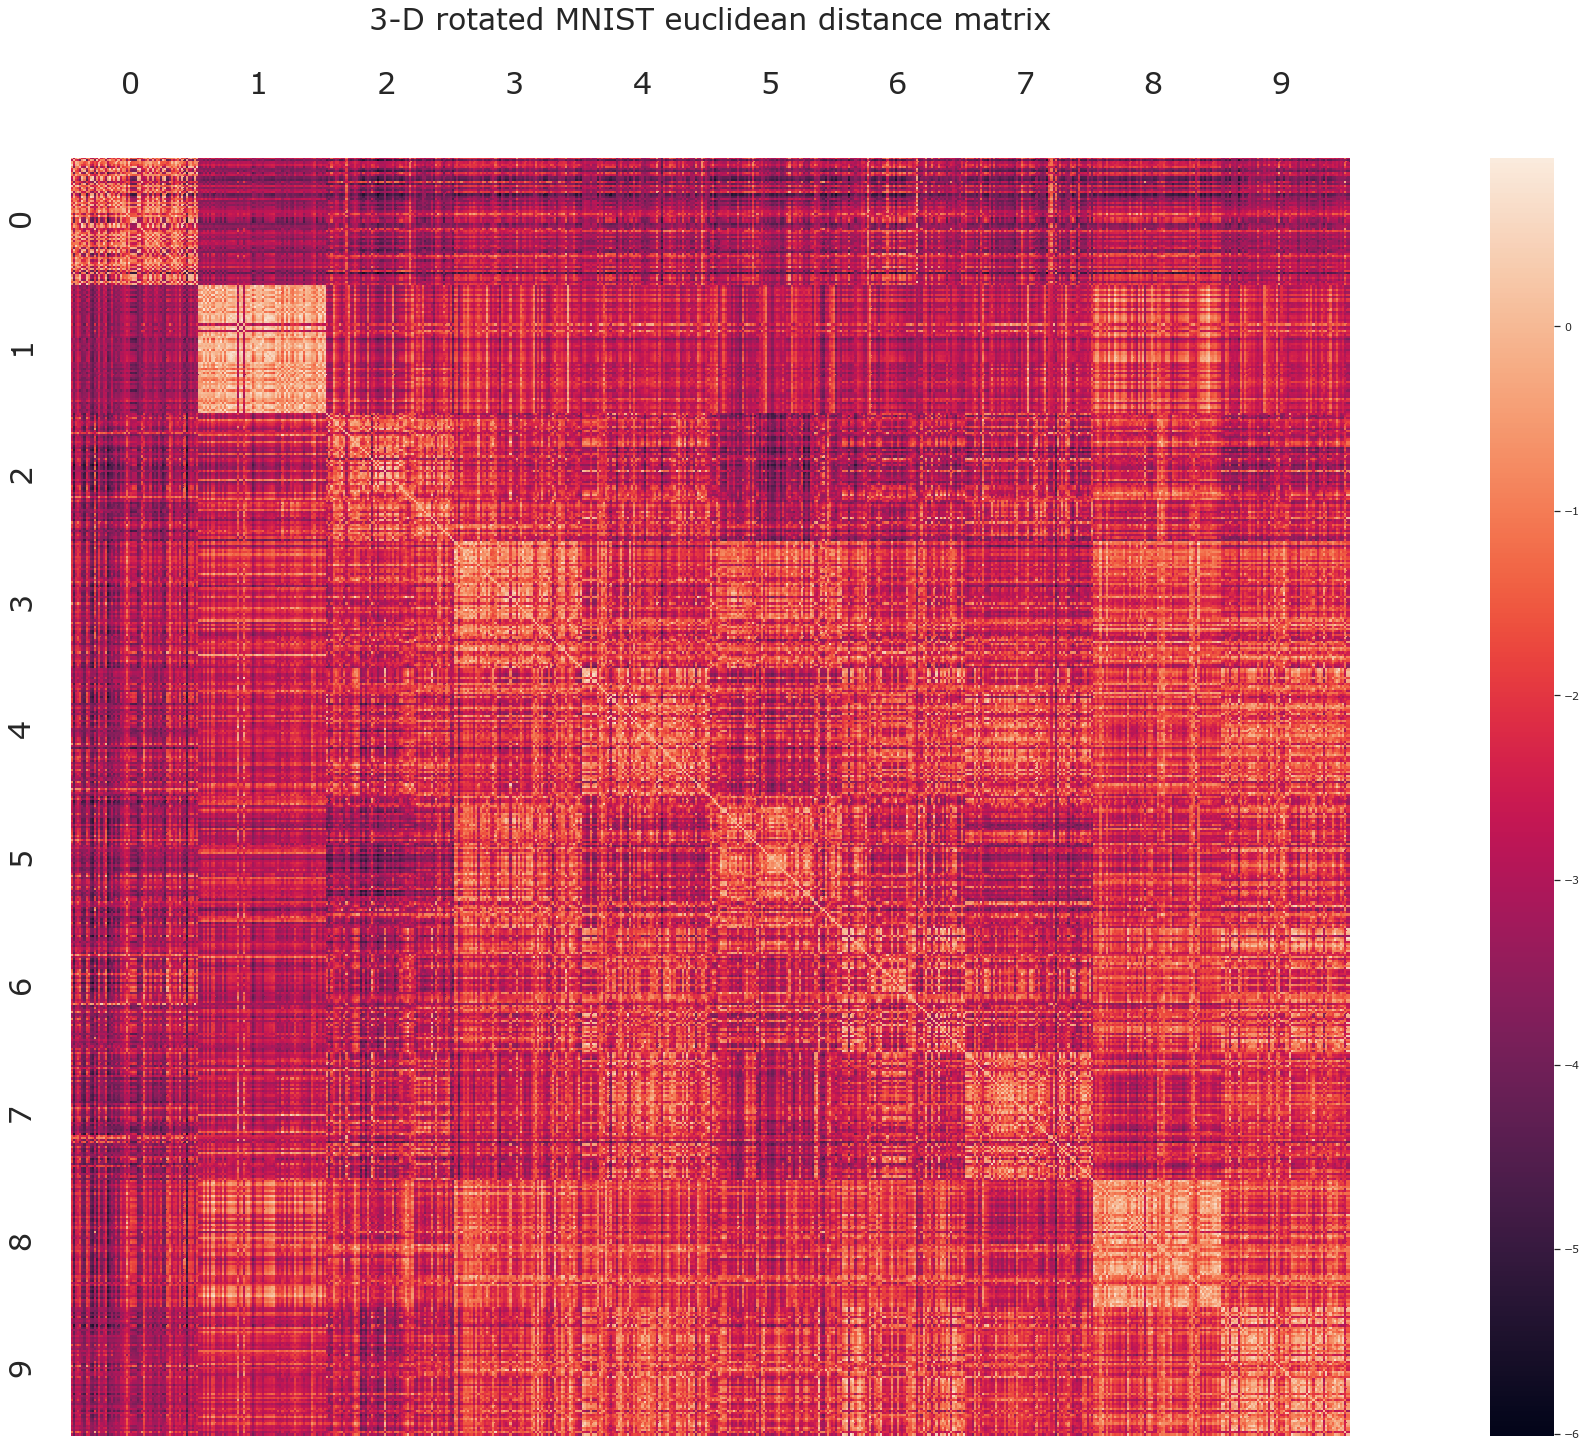

In [22]:

alpha=[[n,60] for n in range(0,10)]

fig, ax = plt.subplots(figsize=(25,20))

plt.axis('equal')
plt.axis('off')


sns.set(font='MS Reference Sans Serif',context='notebook')
ax = sns.heatmap(R1)
for n in range(0,10):
        r=sum([alpha[x][1]  for x in range(0,n)])
        
        plt.annotate(alpha[n][0], xy=(r+2,-30),xytext=(r+(alpha[n][1])*0.5-2,-30),annotation_clip=False,fontsize=30,              #draws an arrow from one set of coordinates to the other
                    fontname='MS Reference Sans Serif',weight='bold', ha='center'  #sets style of arrow and colour
                    )        
        plt.annotate(alpha[n][0], xy=(-30,r+2),xytext=(-30,r+(alpha[n][1])*0.5-2),annotation_clip=False,fontsize=30,              #draws an arrow from one set of coordinates to the other
                    fontname='MS Reference Sans Serif',weight='bold', va='center',rotation=90  #sets style of arrow and colour
                    )  
        
plt.annotate('3-D rotated MNIST euclidean distance matrix', xy=(600/5,600 -600-60),xytext=((600)/2,600-600-60),annotation_clip=False,fontsize=30,              #draws an arrow from one set of coordinates to the other
                    fontname='MS Reference Sans Serif',weight=800, ha='center'  #sets style of arrow and colour
                    ) 


plt.tight_layout()



The distance matrix shows that some numbers are significantly less similar to eachother than others. For example, again, 6 appears to be very heterogenous. Interestingly, 9 is not as heterogenious as 6 although one would expect the same result considering their shapes. 